<a href="https://colab.research.google.com/github/Lavanya-Srinivas214/NND/blob/main/disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 2 images belonging to 3 classes.
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 1.1602
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 1.0000 - loss: 0.4222
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.5000 - loss: 0.6719
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.5000 - loss: 0.4889
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 1.0000 - loss: 0.0563
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 1.0000 - loss: 0.0117
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 1.0000 - loss: 0.0071
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 1.0000 - loss: 0.0047
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 1.0000 - loss: 6.7551e-04
{'Heart Disease': 0, 'Brain Tumor': 1, 'Pneumonia': 2}


Saving heart.jpg to heart.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


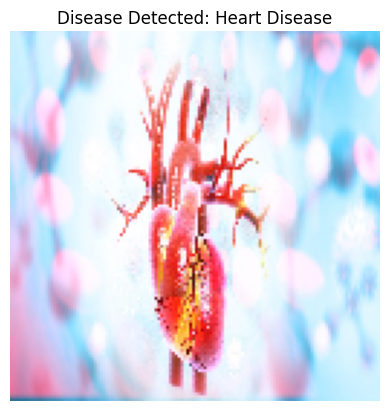

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os # Added import for OS operations
import shutil # Added import for file operations

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

# 3 body-part diseases
model.add(Dense(3, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define the diseases list explicitly
diseases = ['Heart Disease', 'Brain Tumor', 'Pneumonia']

# --- Start of added code for directory setup ---
base_dir = "dataset"
train_dir = os.path.join(base_dir, "train")

# Create base and train directories if they don't exist
os.makedirs(train_dir, exist_ok=True)

# Create class subdirectories for each disease
for disease_name in diseases:
    os.makedirs(os.path.join(train_dir, disease_name), exist_ok=True)

# Move existing uploaded images to their respective class directories
# Check if the files exist in the current directory before moving
if os.path.exists('brain.jpg'):
    shutil.move('brain.jpg', os.path.join(train_dir, 'Brain Tumor', 'brain.jpg'))
if os.path.exists('heart.jpg'):
    shutil.move('heart.jpg', os.path.join(train_dir, 'Heart Disease', 'heart.jpg'))
# --- End of added code for directory setup ---

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir, # Use the created train_dir
    target_size=(128,128),
    batch_size=16,
    class_mode='categorical',
    classes=diseases # Explicitly set classes to ensure consistency with the model
)

# Note: With only 'brain.jpg' and 'heart.jpg', and no images for 'Pneumonia',
# training will be very limited and the model might not learn effectively.
# Consider uploading more images for each disease class.

model.fit(train_data, epochs=10)
print(train_data.class_indices)

# This part is for prediction after potential re-upload. Original files were moved for training.
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = load_img(img_path, target_size=(128,128))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_index = np.argmax(prediction)

predicted_disease = diseases[class_index]
plt.imshow(img)
plt.axis('off')
plt.title(f"Disease Detected: {predicted_disease}")
plt.show()

Found 2 images belonging to 3 classes.
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.0980
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 1.0000 - loss: 0.3970
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.5000 - loss: 0.8993
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 1.0000 - loss: 0.1453
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 1.0000 - loss: 0.2958
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 1.0000 - loss: 0.0630
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 1.0000 - loss: 0.0176
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 1.0000 - loss: 0.0065
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 1.0000 - loss: 0.0033
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 1.0000 - loss: 0.0019
{'Heart Disease': 0, 'Brain Tumor': 1, 'Pneumonia': 2}


Saving brain.jpg to brain.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


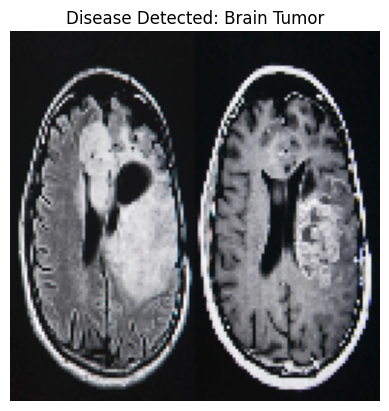

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os # Added import for OS operations
import shutil # Added import for file operations

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

# 3 body-part diseases
model.add(Dense(3, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define the diseases list explicitly
diseases = ['Heart Disease', 'Brain Tumor', 'Pneumonia']

# --- Start of added code for directory setup ---
base_dir = "dataset"
train_dir = os.path.join(base_dir, "train")

# Create base and train directories if they don't exist
os.makedirs(train_dir, exist_ok=True)

# Create class subdirectories for each disease
for disease_name in diseases:
    os.makedirs(os.path.join(train_dir, disease_name), exist_ok=True)

# Move existing uploaded images to their respective class directories
# Check if the files exist in the current directory before moving
if os.path.exists('brain.jpg'):
    shutil.move('brain.jpg', os.path.join(train_dir, 'Brain Tumor', 'brain.jpg'))
if os.path.exists('heart.jpg'):
    shutil.move('heart.jpg', os.path.join(train_dir, 'Heart Disease', 'heart.jpg'))
# --- End of added code for directory setup ---

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir, # Use the created train_dir
    target_size=(128,128),
    batch_size=16,
    class_mode='categorical',
    classes=diseases # Explicitly set classes to ensure consistency with the model
)

# Note: With only 'brain.jpg' and 'heart.jpg', and no images for 'Pneumonia',
# training will be very limited and the model might not learn effectively.
# Consider uploading more images for each disease class.

model.fit(train_data, epochs=10)
print(train_data.class_indices)

# This part is for prediction after potential re-upload. Original files were moved for training.
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = load_img(img_path, target_size=(128,128))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_index = np.argmax(prediction)

predicted_disease = diseases[class_index]
plt.imshow(img)
plt.axis('off')
plt.title(f"Disease Detected: {predicted_disease}")
plt.show()